In [1]:
import os

import numpy
import pandas
import matplotlib
from matplotlib import pyplot
import seaborn

import logomaker

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 120
pandas.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


# Helper functions

In [3]:
def one_hot_encode(sequences, seq_len=100):
    # Dictionary returning one-hot encoding of nucleotides. 
    nuc_d = {'a':[1,0,0,0],
             'c':[0,1,0,0],
             'g':[0,0,1,0],
             't':[0,0,0,1],
             'n':[0,0,0,0]}
    
    # Creat empty matrix
    vectors = numpy.empty([len(sequences), seq_len, 4])
    
    # Iterate through sequences and one-hot encode
    for i, seq in enumerate(sequences): 
        seq = seq[:seq_len].lower()
        a = numpy.array([nuc_d[x] for x in seq])
        vectors[i] = a
    return vectors

In [4]:
def plot_pwm(seq, title=None):
    pwm = one_hot_encode([seq], seq_len=len(seq))[0]
    # Calculate entropy and conservation
    entropy = numpy.zeros_like(pwm)
    entropy[pwm > 0] = pwm[pwm > 0] * -numpy.log2(pwm[pwm > 0])
    entropy = numpy.sum(entropy, axis=1)
    conservation = 2 - entropy
    # Nucleotide height
    nt_height = numpy.tile(numpy.reshape(conservation, (-1, 1)), (1, 4))
    nt_height = pwm * nt_height

    nt_height_df = pandas.DataFrame(
        nt_height,
        columns=['A', 'C', 'G', 'T'],
    )

    fig = pyplot.figure(figsize=(len(seq)/5., 0.4))
    ax = fig.add_subplot(1, 1, 1)
    logo = logomaker.Logo(
        nt_height_df,
        color_scheme='classic',
        ax=ax,
    )
    logo.style_spines(visible=False)
    logo.style_spines(spines=['bottom'], visible=True, linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None:
        ax.set_title(title)

# Extract data

In [5]:
data_folder = '../fastseqprop'

In [6]:
# # 4 SeqProp sequences, 50nt utr (pick at least 1 with strong hairpin structure)
# data_filename = 'optimus5_seqprop_designs_50nt.csv'
# data_design = 'am_st'
# n_seqs_to_save = 4
# output_filename = 'seqprop_optimus5p_50bp_selected.csv'

# # 4 SeqProp sequences, 50nt utr, with VAE reg.
# data_filename = 'optimus5_seqprop_designs_50nt.csv'
# data_design = 'am_st_vae'
# n_seqs_to_save = 4
# output_filename = 'seqprop_vae_optimus5p_50bp_selected.csv'

# # 5 SeqProp sequences, 25nt utr (pick at least 1 with strong hairpin structure)
# data_filename = 'optimus5_seqprop_designs_25nt.csv'
# data_design = 'am_st'
# n_seqs_to_save = 5
# output_filename = 'seqprop_optimus5p_25bp_selected.csv'

# 2 SeqProp sequences, 25nt utr, with VAE reg.
data_filename = 'optimus5_seqprop_designs_25nt.csv'
data_design = 'am_st_vae'
n_seqs_to_save = 2
output_filename = 'seqprop_vae_optimus5p_25bp_selected.csv'

In [7]:
# Load and filter data
data_path = os.path.join(data_folder, data_filename)
data = pandas.read_csv(data_path, delimiter='\t')
data = data[data['design']==data_design]
data

,seq,design,pred_optimus_5,pred_k_mer_no_uaug
10,TTTACCGGAATCCGAATTTGCGAAA,am_st_vae,7.193543,7.154988
11,TTCCGACCTTCCGAGGAGTTTAAGA,am_st_vae,7.180800,6.783800
12,CTACGGTTGTCTGAGTAATTCAAGA,am_st_vae,6.904998,7.030689
13,CTTATCCGACTCTCTATTGATTGAA,am_st_vae,7.016870,7.260861
14,CTTTACCGTTACTCTAGGAGAAGAA,am_st_vae,7.043694,6.858403
15,CTAACGTGTGTCACTCTTAGTAACT,am_st_vae,7.028362,6.704139
16,TATCCGGATATCCTTTAGGGTTCAA,am_st_vae,6.859970,6.917194
17,CGATTCACTCGAAGGAATTTTAGAT,am_st_vae,6.986636,6.636121
18,TATCCGTTTACTCTATAGAGTGGAT,am_st_vae,7.138167,7.011954
19,TTCCAGTCTCTTCTGAGAAGTGGAT,am_st_vae,7.340373,6.953503


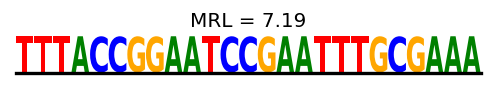

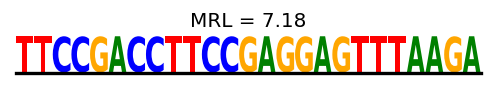

In [8]:
# Choose five to be saved
data_selected = data.iloc[:n_seqs_to_save]

# Plot sequences
for index, row in data_selected.iterrows():
    plot_pwm(
        row['seq'],
        title="MRL = {:.2f}".format(row['pred_optimus_5']),
    )

In [9]:
# Save
data_to_save = data_selected.rename(
    columns={
        'seq': "5'UTR",
        'pred_optimus_5': "Predicted MRL"
    }
)
data_to_save = data_to_save[["5'UTR", "Predicted MRL"]]
data_to_save.to_csv(output_filename, index=False)